# Portfolio Project for Codecademy
### Dataset of choice: Drug Consumption (Quantified) from UCI Machine Learning Repository
**Goal:** Classification of Users vs Non-users 

Users are classified as using the substance within the last 10 years 

Non-users are classifed as either never having used or used over a decade ago 


In [ ]:
# Requirements + Installs 
!pip install ucimlrepo
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn


   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   - -------------------------------------- 2.4/56.8 MB 16.8 MB/s eta 0:00:04
   ---- ----------------------------------- 6.3/56.8 MB 17.6 MB/s eta 0:00:03
   ------ --------------------------------- 9.7/56.8 MB 17.8 MB/s eta 0:00:03
   --------- ------------------------------ 13.6/56.8 MB 18.2 MB/s eta 0:00:03
   ------------ --------------------------- 17.6/56.8 MB 18.2 MB/s eta 0:00:03
   --------------- ------------------------ 22.5/56.8 MB 18.8 MB/s eta 0:00:02
   ------------------ --------------------- 25.7/56.8 MB 18.5 MB/s eta 0:00:02
   -------------------- ------------------- 29.1/56.8 MB 17.9 MB/s eta 0:00:02
   ---------------------- ----------------- 32.0/56.8 MB 17.4 MB/s eta 0:00:02
   ------------------------- -------------- 35.9/56.8 MB 17.4 MB/s eta 0:00:02
   --------------------------- ------------ 39.6/56.8 MB 17.6 MB/s eta 0:00:01
   ----------------------------- ---------- 42.5/56.8 MB 17.2 MB

In [48]:
# Imports
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [ ]:
# fetching dataset 
drug_consumption_quantified = fetch_ucirepo(id=373) 

# data (as pandas dataframes) 
X = drug_consumption_quantified.data.features 
y = drug_consumption_quantified.data.targets 

# metadata 
print(drug_consumption_quantified.metadata) 
  
# variable information 
print(drug_consumption_quantified.variables) 

{'uci_id': 373, 'name': 'Drug Consumption (Quantified)', 'repository_url': 'https://archive.ics.uci.edu/dataset/373/drug+consumption+quantified', 'data_url': 'https://archive.ics.uci.edu/static/public/373/data.csv', 'abstract': 'Classify type of drug consumer by personality data', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1885, 'num_features': 12, 'feature_types': ['Real'], 'demographics': ['Age', 'Gender', 'Education Level', 'Nationality', 'Ethnicity'], 'target_col': ['alcohol', 'amphet', 'amyl', 'benzos', 'caff', 'cannabis', 'choc', 'coke', 'crack', 'ecstasy', 'heroin', 'ketamine', 'legalh', 'lsd', 'meth', 'mushrooms', 'nicotine', 'semer', 'vsa'], 'index_col': ['id'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C5TC7S', 'creators': ['Elaine Fehrman', 'Vincent Egan', 'Evgeny Mirkes'], 'intro_paper': {'ID': 413, 

### Data analysis

In [37]:
print(X.head())
print(y.head())

print(y.info())
print(y.describe()) # check unique classes for alcohol use


       age   gender  education  country  ethnicity   nscore   escore   oscore  \
0  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545 -0.58331   
1 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886  1.43533   
2  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523 -0.84732   
3 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615 -0.01928   
4  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340 -0.45174   

    ascore   cscore  impuslive       ss  
0 -0.91699 -0.00665   -0.21712 -1.18084  
1  0.76096 -0.14277   -0.71126 -0.21575  
2 -1.62090 -1.01450   -1.37983  0.40148  
3  0.59042  0.58489   -1.37983 -1.18084  
4 -0.30172  1.30612   -0.21712 -0.21575  
0    CL2
1    CL2
2    CL0
3    CL0
4    CL1
Name: amphet, dtype: object
<class 'pandas.core.series.Series'>
RangeIndex: 1885 entries, 0 to 1884
Series name: amphet
Non-Null Count  Dtype 
--------------  ----- 
1885 non-null   object
dtypes: object(1)
memory us

###  Model



Best Depth: 1, Best Accuracy: 0.9611307420494699


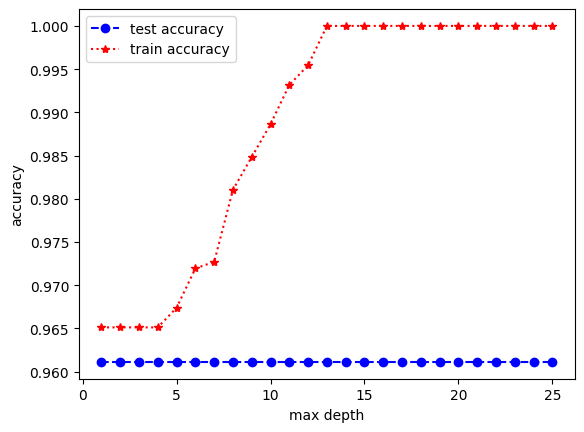

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.96      1.00      0.98       544

    accuracy                           0.96       566
   macro avg       0.48      0.50      0.49       566
weighted avg       0.92      0.96      0.94       566



c:\Users\texxm\anaconda3\envs\codecademy_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\texxm\anaconda3\envs\codecademy_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\texxm\anaconda3\envs\codecademy_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capi

In [ ]:
# Fetching features and target variable 
X = drug_consumption_quantified.data.features 
y = drug_consumption_quantified.data.targets 
  

y = y['alcohol']  # Choosing alcohol as target variable can be changed to any other drug

# Converting to binary classification (0: No use, 1: Any use)
y_binary = y.map(lambda x: 0 if x == 'CL0' or x == 'CL1' else 1)  # Converting to binary classification (0: No use, 1: Any use)

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

accuracy_train = []
accuracy_test = []
depths = range(1, 26)

for depth in depths:
    rfc = RandomForestClassifier(max_depth=depth, random_state=42)
    rfc.fit(X_train, y_train)
    accuracy_train.append(rfc.score(X_train, y_train))
    accuracy_test.append(rfc.score(X_test, y_test))

best_accuracy = max(accuracy_test)
best_depth = accuracy_test.index(best_accuracy) + 1
print(f"Best Depth: {best_depth}, Best Accuracy: {best_accuracy}")

# Plotting accuracy vs depth
#Plot the accuracy scores for the test and train set over the range of depth values  
plt.plot(depths, accuracy_test,'bo--',depths, accuracy_train,'r*:')
plt.legend(['test accuracy', 'train accuracy'])
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.show()


best_model = RandomForestClassifier(max_depth=best_depth, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))



### Pipeline 
For one drug to prove it works


In [45]:
# Fetching features and target variable 
X = drug_consumption_quantified.data.features 
y = drug_consumption_quantified.data.targets 

y_binary = y.map(lambda x: 0 if x == 'CL0' or x == 'CL1' else 1)  # Converting to binary classification (0: No use, 1: Any use)
drugs = y.columns.to_list()  
drug_of_choice = 'alcohol'  # Change this to target a different drug
y_binary = y_binary[drug_of_choice]  # Choosing alcohol as target variable can be changed to any other drug

# y = y['amphet']  # Targeting alcohol use for this example



X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

pipeline = Pipeline([('scale', StandardScaler()), ('rfc', RandomForestClassifier(random_state=42))])

params_grid = {
    'rfc__n_estimators': [50, 100, 200],
    'rfc__max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(pipeline, params_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate the best model from grid search on the test set
best_pipeline_model = grid_search.best_estimator_
print("best model:", best_pipeline_model)
y_pred_grid = best_pipeline_model.predict(X_test)
print(classification_report(y_test, y_pred_grid))


Best parameters: {'rfc__max_depth': None, 'rfc__n_estimators': 200}
Best cross-validation score: 0.9651255905058187
best model: Pipeline(steps=[('scale', StandardScaler()),
                ('rfc',
                 RandomForestClassifier(n_estimators=200, random_state=42))])
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.96      1.00      0.98       544

    accuracy                           0.96       566
   macro avg       0.48      0.50      0.49       566
weighted avg       0.92      0.96      0.94       566



c:\Users\texxm\anaconda3\envs\codecademy_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\texxm\anaconda3\envs\codecademy_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\texxm\anaconda3\envs\codecademy_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capi

### Final Pipeline
For all drugs at once with proper results collection

In [50]:
# Fetching features and target variable 
X = drug_consumption_quantified.data.features 
y = drug_consumption_quantified.data.targets 

# List of drugs
drugs = y.columns.to_list()  

# Create a binary target variable for each drug
y_binary = y.map(lambda x: 0 if x == 'CL0' or x == 'CL1' else 1)  # Converting to binary classification (0: No use, 1: Any use)

results = []
for drug in drugs:
    print(f"Processing drug: {drug}")

    # Select the binary target for the current drug
    y_binary_drug = y_binary[drug]  

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y_binary_drug, test_size=0.3, random_state=42)
    pipeline = Pipeline([('scale', StandardScaler()), ('rfc', RandomForestClassifier(random_state=42))])

    params_grid = {
        'rfc__n_estimators': [50, 100, 200],
        'rfc__max_depth': [None, 10, 20, 30]
    }

    grid_search = GridSearchCV(pipeline, params_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best model and make predictions
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_prob = best_model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_prob)

    # Store results
    drug_results = {
        'drug': drug,
        'best_params': grid_search.best_params_,
        'cv_score': grid_search.best_score_,
        'test_accuracy': accuracy,
        'test_precision': precision,
        'test_recall': recall,
        'test_f1': f1,
        'test_roc_auc': roc_auc,
        'class_distribution': y_binary_drug.value_counts().to_dict()
    }

    results.append(drug_results)

    print(f"Test Accuracy: {accuracy:.4f}, F1: {f1:.4f}, ROC-AUC: {roc_auc:.4f}")
    print("-" * 50)

# Convert results to DataFrame for easy analysis
results_df = pd.DataFrame(results)

# Display summary statistics
print("\n=== SUMMARY RESULTS ===")
print(results_df[['drug', 'cv_score', 'test_accuracy', 'test_f1', 'test_roc_auc']].round(4))

# Find best performing drugs
best_accuracy = results_df.loc[results_df['test_accuracy'].idxmax()]
best_f1 = results_df.loc[results_df['test_f1'].idxmax()]
best_roc_auc = results_df.loc[results_df['test_roc_auc'].idxmax()]

print(f"\nBest Accuracy: {best_accuracy['drug']} ({best_accuracy['test_accuracy']:.4f})")
print(f"Best F1-Score: {best_f1['drug']} ({best_f1['test_f1']:.4f})")
print(f"Best ROC-AUC: {best_roc_auc['drug']} ({best_roc_auc['test_roc_auc']:.4f})")

# Save results to CSV for further analysis
results_df.to_csv('drug_classification_results.csv', index=False)


Processing drug: alcohol
Test Accuracy: 0.9611, F1: 0.9802, ROC-AUC: 0.5566
--------------------------------------------------
Processing drug: amphet
Test Accuracy: 0.7191, F1: 0.5849, ROC-AUC: 0.7733
--------------------------------------------------
Processing drug: amyl
Test Accuracy: 0.8145, F1: 0.1860, ROC-AUC: 0.7165
--------------------------------------------------
Processing drug: benzos
Test Accuracy: 0.7244, F1: 0.6303, ROC-AUC: 0.7683
--------------------------------------------------
Processing drug: caff
Test Accuracy: 0.9806, F1: 0.9902, ROC-AUC: 0.6412
--------------------------------------------------
Processing drug: cannabis
Test Accuracy: 0.8145, F1: 0.8666, ROC-AUC: 0.8880
--------------------------------------------------
Processing drug: choc
Test Accuracy: 0.9876, F1: 0.9938, ROC-AUC: 0.4203
--------------------------------------------------
Processing drug: coke
Test Accuracy: 0.7032, F1: 0.5579, ROC-AUC: 0.7411
------------------------------------------------

c:\Users\texxm\anaconda3\envs\codecademy_env\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\texxm\anaconda3\envs\codecademy_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Test Accuracy: 0.9947, F1: 0.0000, ROC-AUC: 0.4574
--------------------------------------------------
Processing drug: vsa
Test Accuracy: 0.8710, F1: 0.0519, ROC-AUC: 0.7829
--------------------------------------------------

=== SUMMARY RESULTS ===
         drug  cv_score  test_accuracy  test_f1  test_roc_auc
0     alcohol    0.9651         0.9611   0.9802        0.5566
1      amphet    0.7263         0.7191   0.5849        0.7733
2        amyl    0.8090         0.8145   0.1860        0.7165
3      benzos    0.6982         0.7244   0.6303        0.7683
4        caff    0.9803         0.9806   0.9902        0.6412
5    cannabis    0.7961         0.8145   0.8666        0.8880
6        choc    0.9788         0.9876   0.9938        0.4203
7        coke    0.6967         0.7032   0.5579        0.7411
8       crack    0.8984         0.8940   0.0909        0.7228
9     ecstasy    0.7559         0.7173   0.6522        0.8029
10     heroin    0.8901         0.8763   0.1250        0.7316
11   k

### Key Findings 
The binary classification models achieved varying levels of success across different substances, with several important patterns emerging from the results:

High-Performing Models: Substances like chocolate (F1: 0.9938), caffeine (F1: 0.9902), and alcohol (F1: 0.9802) demonstrated excellent classification performance, likely reflecting their widespread consumption.

Moderate Performance: Cannabis (ROC-AUC: 0.8880), legal highs (ROC-AUC: 0.8588), and ecstasy (ROC-AUC: 0.8029) showed reasonable predictive capability, suggesting personality and demographic features provide meaningful signal for these substances.

Challenging Classifications: Several substances including crack (F1: 0.0909), heroin (F1: 0.1250), and ketamine (F1: 0.0541) exhibited poor F1 scores despite high accuracy, indicating severe class imbalance where models defaulted to predicting the majority class.
